In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import linear_model,model_selection
os.chdir('E:/German_credit')
%matplotlib inline
from matplotlib.font_manager import FontProperties
font=FontProperties(fname=r"C:\\Windows\\Fonts\\msyh.ttf",size=12)

# 数据获取

In [2]:
Data=pd.read_csv('german_credit.csv',header=0)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null int64
Account Balance                      1000 non-null int64
Duration of Credit (month)           1000 non-null int64
Payment Status of Previous Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit Amount                        1000 non-null int64
Value Savings/Stocks                 1000 non-null int64
Length of current employment         1000 non-null int64
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null int64
Guarantors                           1000 non-null int64
Duration in Current address          1000 non-null int64
Most valuable available asset        1000 non-null int64
Age (years)                          1000 non-null int64
Concurrent Credits                   1000 non-null int64
Type of apartment                    10

# 数据类型转换与数据描述

'Duration of Credit (month)','Credit Amount','Instalment per cent','Duration in Current address','Age (years)','No of Credits at this Bank','No of dependents'为连续性变量，其余均为类别型特征

In [3]:
Data_object=Data.drop(['Duration of Credit (month)','Credit Amount','Age (years)'], axis=1)

In [4]:
Data_object=Data_object.astype('object')

In [5]:
Data_numeric=Data[['Duration of Credit (month)','Credit Amount','Age (years)']]

In [6]:
NewData=pd.concat([Data_object,Data_numeric],axis=1)
NewData.shape

(1000, 21)

In [7]:
NewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null object
Account Balance                      1000 non-null object
Payment Status of Previous Credit    1000 non-null object
Purpose                              1000 non-null object
Value Savings/Stocks                 1000 non-null object
Length of current employment         1000 non-null object
Instalment per cent                  1000 non-null object
Sex & Marital Status                 1000 non-null object
Guarantors                           1000 non-null object
Duration in Current address          1000 non-null object
Most valuable available asset        1000 non-null object
Concurrent Credits                   1000 non-null object
Type of apartment                    1000 non-null object
No of Credits at this Bank           1000 non-null object
Occupation                           1000 non-null object
No of dependents        

In [8]:
states={'Creditability':'target', #目标变量，其中 1代表好客户（会还本付息）(未响应变量，或者说负类)，0则是代表坏客户(响应类别，或者说正类)
        'Account Balance':'账户状态',
        'Payment Status of Previous Credit':'信用历史付款状况',
        'Purpose':'资金用途',
        'Value Savings/Stocks':'储蓄情况',
        'Length of current employment':'工作年限',
        'Instalment per cent':'分期利率',
        'Sex & Marital Status':'婚姻状况',
        'Guarantors':'担保机构(类型)',
        'Duration of Credit (month)':'信用期限(月)',
        'Most valuable available asset':'财产状况',
        'Concurrent Credits':'共同账户(类型)',
        'Type of apartment':'住房类型',
        'No of Credits at this Bank':'信用卡数量',
        'Occupation':'工作(类型)',
        'No of dependents':'担保人数量',
        'Telephone':'是否有电话',
        'Foreign Worker':'是否外籍工作者',
        'Duration in Current address':'现地址居住时间',
        'Credit Amount':'信贷金额',
        'Age (years)':'年龄'}
NewData.rename(columns=states,inplace=True)
NewData.head()

,target,账户状态,信用历史付款状况,资金用途,储蓄情况,工作年限,分期利率,婚姻状况,担保机构(类型),现地址居住时间,...,共同账户(类型),住房类型,信用卡数量,工作(类型),担保人数量,是否有电话,是否外籍工作者,信用期限(月),信贷金额,年龄
0,1,1,4,2,1,2,4,2,1,4,...,3,1,1,3,1,1,1,18,1049,21
1,1,1,4,0,1,3,2,3,1,2,...,3,1,2,3,2,1,1,9,2799,36
2,1,2,2,9,2,4,2,2,1,4,...,3,1,1,2,1,1,1,12,841,23
3,1,1,4,0,1,3,3,3,1,2,...,3,1,2,2,2,1,2,12,2122,39
4,1,1,4,0,1,3,4,3,1,4,...,1,2,2,2,1,1,2,12,2171,38


In [9]:
NewData.describe()

,信用期限(月),信贷金额,年龄
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


先查看连续变量的直方图和箱线图分布情况

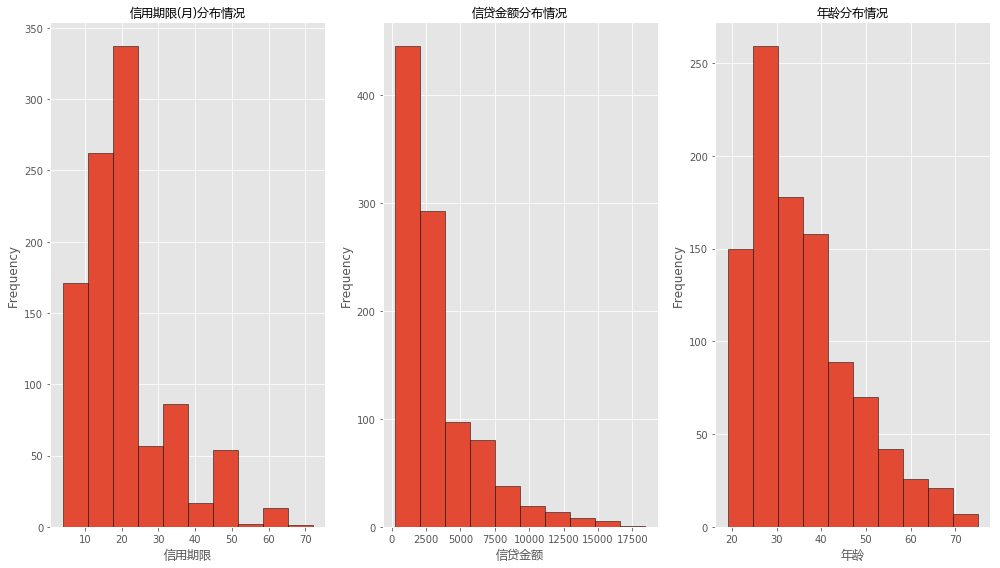

In [10]:
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')
# plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=(14,8)) #调整图形大小
plt.subplot2grid((1,3),(0,0))
NewData['信用期限(月)'].plot(kind='hist',edgecolor='black')# 直方图 
plt.xlabel('信用期限',fontproperties=font)
plt.title("信用期限(月)分布情况",fontproperties=font) # 标题

plt.subplot2grid((1,3),(0,1))
NewData['信贷金额'].plot(kind="hist",edgecolor='black')
plt.xlabel('信贷金额',fontproperties=font)
plt.title("信贷金额分布情况",fontproperties=font)

plt.subplot2grid((1,3),(0,2))
NewData['年龄'].plot(kind="hist",edgecolor='black')
plt.xlabel('年龄',fontproperties=font)
plt.title("年龄分布情况",fontproperties=font)
plt.tight_layout() #防止图形之间重叠
plt.show()

C:\Users\kmxie\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


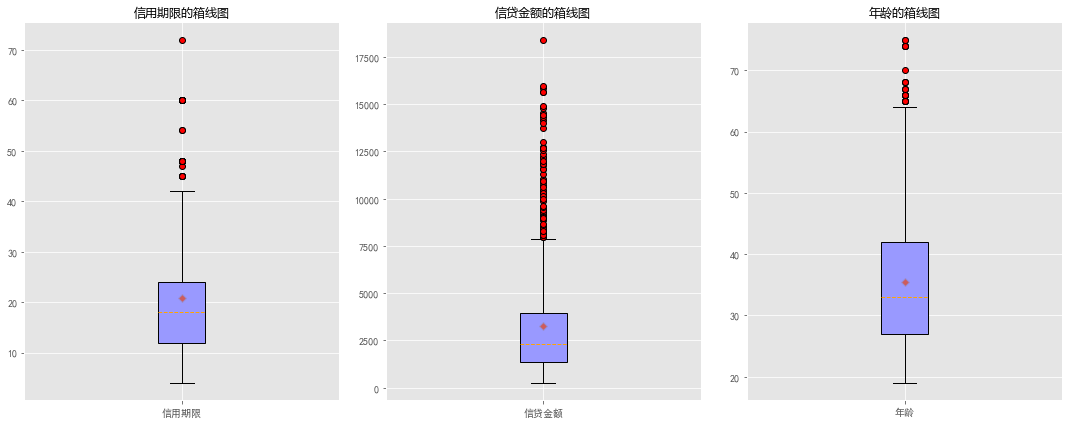

In [11]:
plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(15,6)) 
plt.subplot(131)
plt.boxplot(x=NewData['信用期限(月)'],patch_artist=True,showmeans=True,boxprops={'color':'black','facecolor':'#9999ff'},
           flierprops={'marker':'o','markerfacecolor':'red','color':'black'},meanprops={'marker':'D','markerfacecolor':'indianred'},
           medianprops={'linestyle':'--','color':'orange'},vert=True,labels=['信用期限'])
plt.title('信用期限的箱线图',fontproperties=font)
# plt.xlabel('箱线图',fontproperties=font)
plt.tick_params(top='off',right='off')

plt.subplot(132)
plt.boxplot(x=NewData['信贷金额'],patch_artist=True,showmeans=True,boxprops={'color':'black','facecolor':'#9999ff'},
           flierprops={'marker':'o','markerfacecolor':'red','color':'black'},meanprops={'marker':'D','markerfacecolor':'indianred'},
           medianprops={'linestyle':'--','color':'orange'},vert=True,labels=['信贷金额'])
plt.title('信贷金额的箱线图',fontproperties=font)
# plt.xlabel('箱线图',fontproperties=font)
plt.tick_params(top='off',right='off')

plt.subplot(133)
plt.boxplot(x=NewData['年龄'],patch_artist=True,showmeans=True,boxprops={'color':'black','facecolor':'#9999ff'},
           flierprops={'marker':'o','markerfacecolor':'red','color':'black'},meanprops={'marker':'D','markerfacecolor':'indianred'},
           medianprops={'linestyle':'--','color':'orange'},vert=True,labels=['年龄'])
plt.title('年龄的箱线图',fontproperties=font)
# plt.xlabel('箱线图',fontproperties=font)
plt.tick_params(top='off',right='off')
plt.tight_layout() #防止图形之间重叠
plt.show()

In [12]:
NewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
target      1000 non-null object
账户状态        1000 non-null object
信用历史付款状况    1000 non-null object
资金用途        1000 non-null object
储蓄情况        1000 non-null object
工作年限        1000 non-null object
分期利率        1000 non-null object
婚姻状况        1000 non-null object
担保机构(类型)    1000 non-null object
现地址居住时间     1000 non-null object
财产状况        1000 non-null object
共同账户(类型)    1000 non-null object
住房类型        1000 non-null object
信用卡数量       1000 non-null object
工作(类型)      1000 non-null object
担保人数量       1000 non-null object
是否有电话       1000 non-null object
是否外籍工作者     1000 non-null object
信用期限(月)     1000 non-null int64
信贷金额        1000 non-null int64
年龄          1000 non-null int64
dtypes: int64(3), object(18)
memory usage: 164.1+ KB


# 数据分箱与变量选择

- **利用woe包自动对连续变量分箱，对离散变量计算woe值**

In [13]:
import woe.feature_process as fp
import woe.eval as eval
#%% woe分箱, iv and transform
data_woe = NewData #用于存储所有数据的woe值
civ_list = []
n_positive = len(NewData['target'][NewData['target']==0])
n_negtive = len(NewData) - n_positive
for column in list(NewData.columns[1:]):
    if NewData[column].dtypes == 'object':
        civ = fp.proc_woe_discrete(NewData, column, n_positive, n_negtive, min_sample=0.05*len(NewData), alpha=0.05)
    else:            
        civ = fp.proc_woe_continuous(NewData, column, n_positive, n_negtive, min_sample=0.05*len(NewData), alpha=0.05)
    civ_list.append(civ)
    data_woe[column] = fp.woe_trans(NewData[column], civ)

---------------process discrete variable:账户状态---------------
-------------process discrete variable:信用历史付款状况-------------
---------------process discrete variable:资金用途---------------


D:\Anaconda3\lib\site-packages\woe\feature_process.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[var] = cpvar


---------------process discrete variable:储蓄情况---------------
---------------process discrete variable:工作年限---------------
---------------process discrete variable:分期利率---------------
---------------process discrete variable:婚姻状况---------------
-------------process discrete variable:担保机构(类型)-------------
-------------process discrete variable:现地址居住时间--------------
---------------process discrete variable:财产状况---------------
-------------process discrete variable:共同账户(类型)-------------
---------------process discrete variable:住房类型---------------
--------------process discrete variable:信用卡数量---------------
--------------process discrete variable:工作(类型)--------------
--------------process discrete variable:担保人数量---------------
--------------process discrete variable:是否有电话---------------
-------------process discrete variable:是否外籍工作者--------------
------------process continuous variable:信用期限(月)-------------
--------------process continuous variable:信贷金额--------------
---------------process c

In [14]:
data_woe

,target,账户状态,信用历史付款状况,资金用途,储蓄情况,工作年限,分期利率,婚姻状况,担保机构(类型),现地址居住时间,...,共同账户(类型),住房类型,信用卡数量,工作(类型),担保人数量,是否有电话,是否外籍工作者,信用期限(月),信贷金额,年龄
0,1,0.876497,2.428335,1.595360,1.423238,1.223775,1.537295,1.459254,1.666622,1.693443,...,1.780725,1.290150,1.618963,1.713658,1.691779,1.629904,1.659728,1.585907,1.694596,1.694596
1,1,0.876497,2.428335,1.327883,1.423238,1.662492,1.850061,1.860143,1.666622,1.624444,...,1.780725,1.290150,1.810306,1.713658,1.710003,1.629904,1.659728,1.989712,1.694596,1.694596
2,1,1.293204,1.428557,1.453433,1.555042,2.089009,1.850061,1.459254,1.666622,1.693443,...,1.780725,1.290150,1.618963,1.791758,1.691779,1.629904,1.659728,1.989712,1.694596,1.694596
3,1,0.876497,2.428335,1.327883,1.423238,1.662492,1.759133,1.860143,1.666622,1.624444,...,1.780725,1.290150,1.810306,1.791758,1.710003,1.629904,2.957489,1.989712,1.694596,1.694596
4,1,0.876497,2.428335,1.327883,1.423238,1.662492,1.537295,1.860143,1.666622,1.693443,...,1.210965,1.890647,1.810306,1.791758,1.691779,1.629904,2.957489,1.989712,1.694596,1.694596
5,1,0.876497,2.428335,1.327883,1.423238,1.223775,1.945908,1.860143,1.666622,1.749535,...,1.780725,1.290150,1.810306,1.791758,1.710003,1.629904,2.957489,1.989712,1.694596,1.694596
6,1,0.876497,2.428335,1.327883,1.423238,2.089009,1.945908,1.860143,1.666622,1.693443,...,1.780725,1.890647,1.810306,1.791758,1.691779,1.629904,2.957489,1.989712,1.694596,1.694596
7,1,0.876497,2.428335,1.327883,1.423238,1.223775,1.850061,1.860143,1.666622,1.693443,...,1.780725,1.890647,1.618963,1.791758,1.710003,1.629904,2.957489,2.940523,1.694596,1.694596
8,1,2.870857,2.428335,2.104657,1.423238,1.375364,1.537295,1.459254,1.666622,1.693443,...,1.780725,1.890647,1.810306,1.713658,1.691779,1.629904,1.659728,1.585907,1.694596,1.694596
9,1,1.293204,1.428557,2.104657,2.400639,1.375364,1.945908,1.459254,1.666622,1.693443,...,1.780725,1.290150,1.618963,1.713658,1.691779,1.629904,1.659728,1.585907,1.694596,1.694596


In [15]:
civ_list

In [16]:
civ_df = eval.eval_feature_detail(civ_list,'output_feature_detail_0315.csv')
# #删除iv值过小的变量
iv_thre = 0.005 #IV阈值
iv = civ_df[['var_name','iv']].drop_duplicates()
iv.index=np.arange(len(iv))
iv.sort_values(by="iv" , ascending=False) #全部满足阈值

账户状态
信用历史付款状况
资金用途
储蓄情况
工作年限
分期利率
婚姻状况
担保机构(类型)
现地址居住时间
财产状况
共同账户(类型)
住房类型
信用卡数量
工作(类型)
担保人数量
是否有电话
是否外籍工作者
信用期限(月)
信贷金额
年龄


,var_name,iv
0,账户状态,4.192590
17,信用期限(月),3.601355
3,储蓄情况,3.515406
1,信用历史付款状况,3.488409
2,资金用途,3.467544
9,财产状况,3.381915
4,工作年限,3.345797
11,住房类型,3.342397
16,是否外籍工作者,3.296726
6,婚姻状况,3.288503


# 建立模型

## Logistic模型(初步baseline)

In [48]:
# from sklearn.linear_model import stochastic_gradient
# sgdc = stochastic_gradient.SGDClassifier()
X=data_woe.iloc[:,1:].astype('float')
y=data_woe.iloc[:,0].astype('int')
train_data,test_data,train_label,test_label=model_selection.train_test_split(X,y,test_size=0.3,random_state=100,stratify=y)
# train_label=train_label.reshape(-1,1)
# test_label=test_label.reshape(-1,1)

In [84]:
logis_clf=linear_model.LogisticRegression(solver='liblinear')
logis_clf.fit(train_data,train_label) 
print(logis_clf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


In [85]:
logis_clf.score(train_data,train_label)

0.7657142857142857

In [86]:
logis_clf.score(test_data,test_label)

0.75

**logistic回归的十折交叉验证结果**

In [133]:
scores = model_selection.cross_val_score(logis_clf, X, y,
                         scoring="accuracy", cv=10,verbose=False)
sum(scores)/10 #十折交叉验证的平均值

0.745

In [72]:
sorted(metrics.SCORERS.keys()) #scoring参数选择

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

## 调参搜索1

In [108]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    # try 12 (6×2) combinations of hyperparameters
    {'C': [0.01, 0.02, 0.05,0.1,0.5,1], 'penalty': ['l1','l2']},
  ]
# train across 5 folds, that's a total of (12)*5=60 rounds of training 
grid_search = GridSearchCV(logis_clf, param_grid, cv=10,
                           scoring='accuracy', return_train_score=True)
grid_search.fit(train_data,train_label)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.01, 0.02, 0.05, 0.1, 0.5, 1], 'penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

**最优参数**

In [100]:
grid_search.best_params_

{'C': 1, 'penalty': 'l1'}

In [101]:
grid_search.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [102]:
cvres = grid_search.cv_results_
cvres 

{'mean_fit_time': array([0.00259991, 0.00260003, 0.00120001, 0.00190003, 0.00159996,
        0.00190001, 0.00769997, 0.00209994, 0.0273001 , 0.00250006,
        0.04450004, 0.0027    ]),
 'std_fit_time': array([0.00091649, 0.00135654, 0.00040004, 0.00030003, 0.00066328,
        0.00030003, 0.00360693, 0.00030003, 0.0062618 , 0.00067088,
        0.01330602, 0.00064028]),
 'mean_score_time': array([0.00140002, 0.00109997, 0.00080004, 0.00069997, 0.00060003,
        0.00039997, 0.00090003, 0.00050004, 0.00049999, 0.00039997,
        0.00090001, 0.0007    ]),
 'std_score_time': array([0.00091653, 0.00113576, 0.00040002, 0.00045824, 0.00048992,
        0.00048986, 0.00030001, 0.00050004, 0.00049999, 0.00048986,
        0.0003    , 0.00045826]),
 'param_C': masked_array(data=[0.01, 0.01, 0.02, 0.02, 0.05, 0.05, 0.1, 0.1, 0.5, 0.5,
                    1, 1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fil

**模型代入最优参数**

In [103]:
logis_clf1=linear_model.LogisticRegression(solver='liblinear',penalty='l1',C=1)
logis_clf1.fit(train_data,train_label) 

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [104]:
logis_clf1.score(train_data,train_label)

0.7685714285714286

In [105]:
logis_clf1.score(test_data,test_label)

0.7366666666666667

**由上述验证发现效果并不显著，并无较大提升**

In [138]:
scores_lg = model_selection.cross_val_score(logis_clf1, X, y,
                         scoring="accuracy", cv=10,verbose=False)
sum(scores_lg)/10

0.75

## RF模型

In [134]:
from sklearn import ensemble
rf_clf=ensemble.RandomForestClassifier(random_state=100)
rf_clf.fit(train_data,train_label)
rf_clf.score(train_data,train_label)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9914285714285714

In [135]:
rf_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [136]:
rf_clf.score(test_data,test_label) #预测

0.72

**Random Forest十折交叉验证的结果**

In [137]:
scores_rf = model_selection.cross_val_score(rf_clf, X, y,
                         scoring="accuracy", cv=10,verbose=False)
sum(scores_rf)/10 #十折交叉验证的平均值

0.718

## 调参搜索2

In [125]:
param_grid = [
    # try 20 (5×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30,50,100], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
forest_cl = ensemble.RandomForestClassifier(random_state=100)
# train across 5 folds, that's a total of (20+6)*5=130 rounds of training 
grid_search = GridSearchCV(forest_cl, param_grid, cv=5,
                           scoring='accuracy', return_train_score=True)
grid_search.fit(train_data,train_label)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30, 50, 100], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [126]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 50}

In [129]:
rf_clf1=ensemble.RandomForestClassifier(random_state=100,max_features=6,n_estimators=50)
rf_clf1.fit(train_data,train_label)
rf_clf1.score(train_data,train_label)

1.0

In [130]:
rf_clf1.score(test_data,test_label)

0.75

**发现虽然调参后rf结果有部分提升，但不如logistic结果好**

In [139]:
scores_rf1 = model_selection.cross_val_score(rf_clf1, X, y,
                         scoring="accuracy", cv=10,verbose=False)
sum(scores_rf1)/10

0.739

## 模型集成

In [152]:
from sklearn import svm,neighbors
from sklearn import ensemble
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [154]:
knn_clf=neighbors.KNeighborsClassifier()

In [155]:
knn_clf.fit(train_data,train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [145]:
svm_clf=svm.LinearSVC()
svm_clf.fit(train_data,train_label)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [146]:
rf_c=ensemble.RandomForestClassifier()
rf_c.fit(train_data,train_label)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [147]:
lg_clf=linear_model.LogisticRegression()
lg_clf.fit(train_data,train_label)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [148]:
GB_clf=GaussianNB()
GB_clf.fit(train_data,train_label)

GaussianNB(priors=None, var_smoothing=1e-09)

In [149]:
DeT_clf=DecisionTreeClassifier()
DeT_clf.fit(train_data,train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [174]:
perceptron = linear_model.Perceptron()
perceptron.fit(train_data, train_label)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [205]:
cl=['knn','svm','rf','logistic','Bayes','DT']
testscore=[knn_clf.score(test_data,test_label),svm_clf.score(test_data,test_label),rf_c.score(test_data,test_label),
          lg_clf.score(test_data,test_label),GB_clf.score(test_data,test_label),DeT_clf.score(test_data,test_label)]
newdf=pd.DataFrame({'Cl':cl,'Test_score':testscore})
newdf

,Cl,Test_score
0,knn,0.733333
1,svm,0.736667
2,rf,0.766667
3,logistic,0.750000
4,Bayes,0.726667
5,DT,0.626667


In [193]:
classfier=['knn','svm','rf','logistic','Bayes','DT','Perception','The_results_ensemble']
pred_label_C=pd.DataFrame([knn_clf.predict(test_data),svm_clf.predict(test_data),rf_c.predict(test_data),
                        lg_clf.predict(test_data),GB_clf.predict(test_data),DeT_clf.predict(test_data),
                         perceptron.predict(test_data)]).T
vote_label=[]
for line in range(len(pred_label_C)):
    line_list=list(pred_label_C.iloc[line,:])
    if sum(line_list)> len(line_list)-sum(line_list):
        vote_label.append(1)
    else:
        vote_label.append(0)

pred_label=pd.DataFrame(pd.concat([pred_label_C,pd.DataFrame(vote_label)],axis=1))
pred_label.columns=classfier


In [194]:
pred_label

,knn,svm,rf,logistic,Bayes,DT,Perception,The_results_ensemble
0,0,1,1,1,0,0,0,0
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,0,1
5,0,0,0,0,0,0,0,0
6,1,1,1,1,1,0,1,1
7,0,1,0,1,0,1,0,0
8,1,1,1,1,1,0,1,1
9,0,1,1,1,1,1,0,1


In [203]:
len(pred_label.The_results_ensemble[np.array(pred_label.The_results_ensemble)==np.array(test_label)])/len(test_label)

0.7633333333333333

看出集成效果并不好，没有rf单独模型的结果好